1. Do a Profiling on all the columns and find out number of missing data points for each Variable. (Drop columns which has lot of Null / NaN values.)

2. Do a Co-relation Analysis and see how the variables are co-related to the target and drop any values you seem not making much sense. (Drop columns which are not co-related, like Identifier columns, Columns having same values in all rows etc)

3. Do a Co-Relation analysis among the independent variables and drop variables if they are closely related. (Drop one column and retain another if the co-relation co-efficient is > +-.7)

4. Impute missing values. (You can use mean, Mode, Impute with fixed values depending on the column)

5. Do a dummy encoding for categorical values. (You can use labelling techniques get_dummies, One-hot Encoding or Label encoding depending on the data)

6. Do standard / min-max scaling on numerical features. (Scale your variables so that no-single variables have more effect on the result)

7. Create new features on the dataset (Example FamilySize = SibSp+Parch + 1

8. Perform an exploratory data analysis on the remaining features and get meaningful insights. You can use density chart to show the distribution, box / scatter to show outliers, Line graph to show any Trend etc

In [1]:
pip install numpy pandas scikit-learn matplot-lib seaborn

ERROR: Could not find a version that satisfies the requirement matplot-lib (from versions: none)
ERROR: No matching distribution found for matplot-lib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [3]:
df=pd.read_csv('titanic_dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


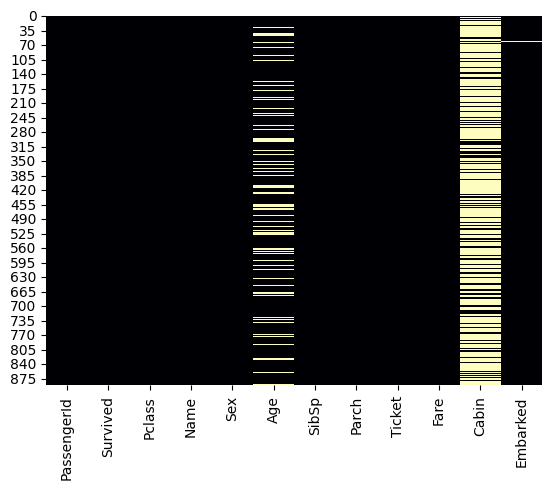

In [8]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Columns or Features Description¶¶
PassengerId: A unique identifier assigned to each passenger.
Survived: Indicates whether a passenger survived (1) or died (0).
Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).
Name: The name of the passenger.
Sex: Represents the gender of the passenger, typically categorized as male or female.
Age: The age of the passenger, often represented as a numerical value.
SibSp: Indicates the number of siblings or spouses traveling with the passenger.
Parch: Represents the number of parents or children traveling with the passenger.¶
Ticket: The ticket number associated with the passenger's ticket.
Fare: The amount of money spent on the ticket.
Cabin: Represents the cabin category or number assigned to the passenger, if available.
Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

In [13]:
sex_counts=df['Sex'].value_counts()
sex_counts

,count
Sex,
male,577
female,314


<ipython-input-14-43b64d439b97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')


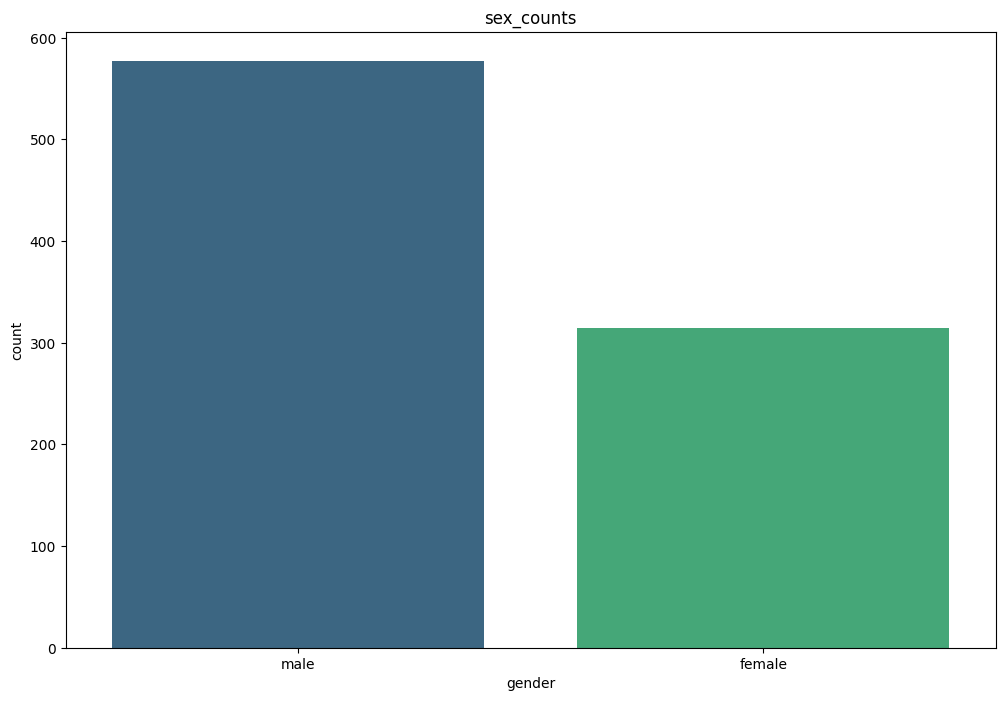

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

<ipython-input-16-329934c4ee34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')


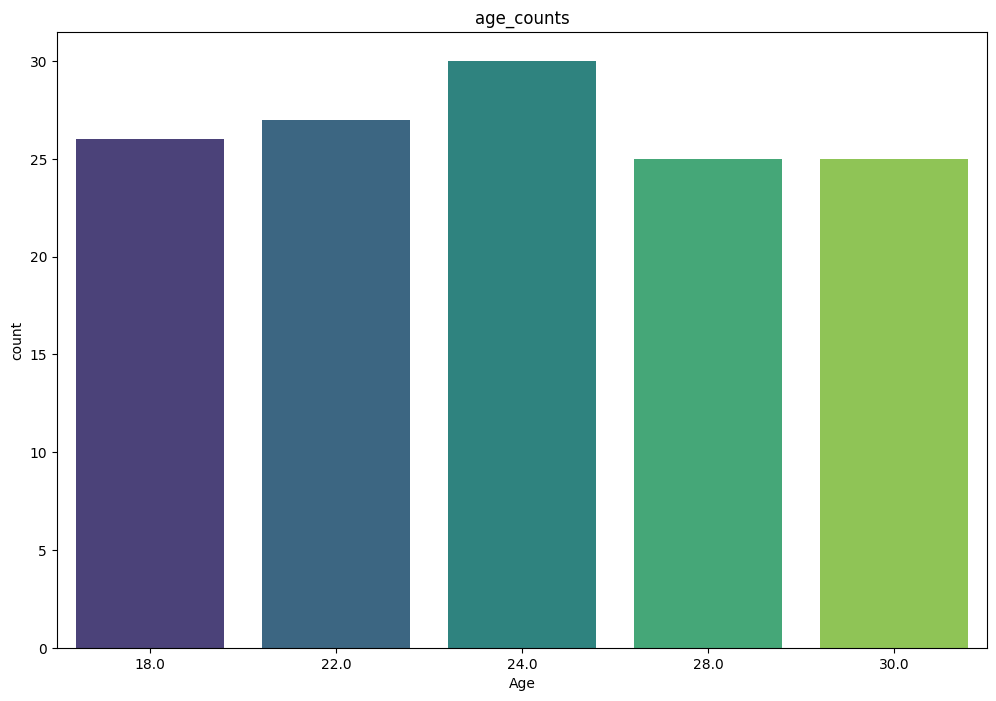

,count
Age,
24.0,30
22.0,27
18.0,26
28.0,25
30.0,25


In [16]:
#the most 5 age in data
age_counts=df['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [18]:
pclass_counts=df['Pclass'].value_counts()
pclass_counts

,count
Pclass,
3,491
1,216
2,184


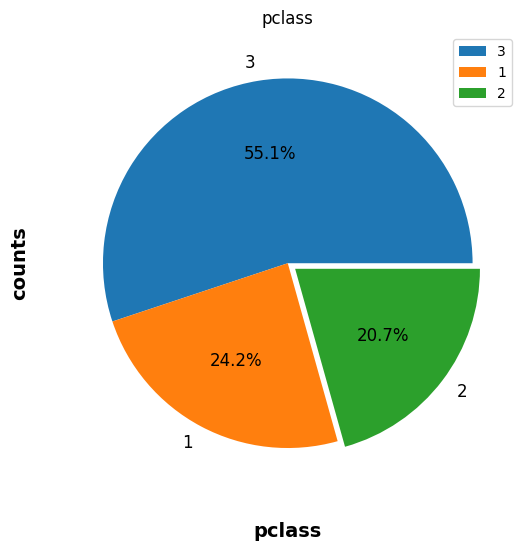

In [19]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

In [20]:
df=df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
### convert the gender to binary 0 and 1
df['Sex']=df['Sex'].replace({'male':1,'female':0})
df.head()

<ipython-input-21-cc79b444f428>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'male':1,'female':0})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [22]:
# Fill missing values in age column by imputing the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

<ipython-input-22-bd1e5ff5c63d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [23]:
# Fill missing values in embarked column by imputing the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isna().sum()

<ipython-input-23-baf5fd74aab6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [24]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})
df.head()

<ipython-input-24-3802158bb8ec>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [28]:
corr_matrix=df.corr()


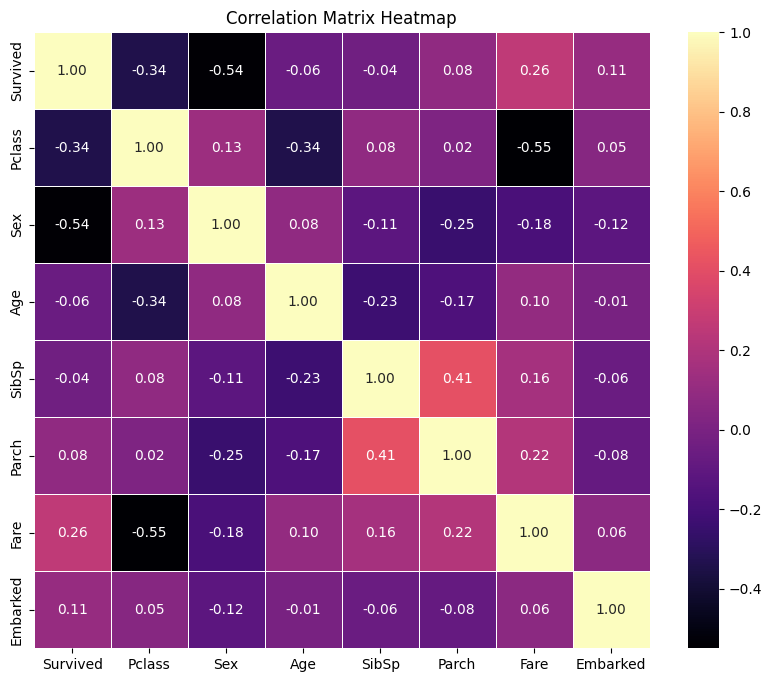

In [30]:
# Set plot size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma", square=True, linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap")

# Show plot
plt.show()
